# Analysis (20250220)

In [ ]:
!pip install nucleus-cdk | tail -n2

In [1]:
%load_ext autoreload
%autoreload 2

from cdk.analysis.cytosol import platereader as pr
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pr.plot_setup()

In [3]:
data, platemap = pr.load_platereader_data(
    data_file="../02-data/20250220-MTHFS-02.txt", 
    platemap_file="../01-design/platemap.tsv", 
    platereader="biotek"
)
data

,Well,Row,Column,Time,Seconds,Temperature (C),Read,Data,Sample #,Name,...,SMS-03-06,bnext p-mix-03-03,NEB Solution A,NEB solution B,RNAse Inhibitor,DNA (deGFP),H2O,MTHFS,"0.2 mM 5,10-methenyl-THF",Total Volume
0,D2,D,2,0 days 00:00:00,0.00,37.00,"485/20,528/20",0.00,1,no folinic acid,...,4.00,1.30,NaN,NaN,0.40,0.50,1.00,0.00,NaN,10.00
1,D2,D,2,0 days 00:05:00,300.00,37.00,"485/20,528/20",7.00,1,no folinic acid,...,4.00,1.30,NaN,NaN,0.40,0.50,1.00,0.00,NaN,10.00
2,D2,D,2,0 days 00:10:00,600.00,37.00,"485/20,528/20",17.00,1,no folinic acid,...,4.00,1.30,NaN,NaN,0.40,0.50,1.00,0.00,NaN,10.00
3,D2,D,2,0 days 00:15:00,900.00,37.00,"485/20,528/20",30.00,1,no folinic acid,...,4.00,1.30,NaN,NaN,0.40,0.50,1.00,0.00,NaN,10.00
4,D2,D,2,0 days 00:20:00,1200.00,37.00,"485/20,528/20",40.00,1,no folinic acid,...,4.00,1.30,NaN,NaN,0.40,0.50,1.00,0.00,NaN,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,D20,D,20,0 days 08:40:00,31200.00,37.00,"485/20,528/20",5.00,10,Negative,...,NaN,NaN,4.00,3.00,0.00,0.00,3.00,NaN,NaN,10.00
1086,D20,D,20,0 days 08:45:00,31500.00,37.00,"485/20,528/20",5.00,10,Negative,...,NaN,NaN,4.00,3.00,0.00,0.00,3.00,NaN,NaN,10.00
1087,D20,D,20,0 days 08:50:00,31800.00,37.00,"485/20,528/20",6.00,10,Negative,...,NaN,NaN,4.00,3.00,0.00,0.00,3.00,NaN,NaN,10.00
1088,D20,D,20,0 days 08:55:00,32100.00,37.00,"485/20,528/20",6.00,10,Negative,...,NaN,NaN,4.00,3.00,0.00,0.00,3.00,NaN,NaN,10.00


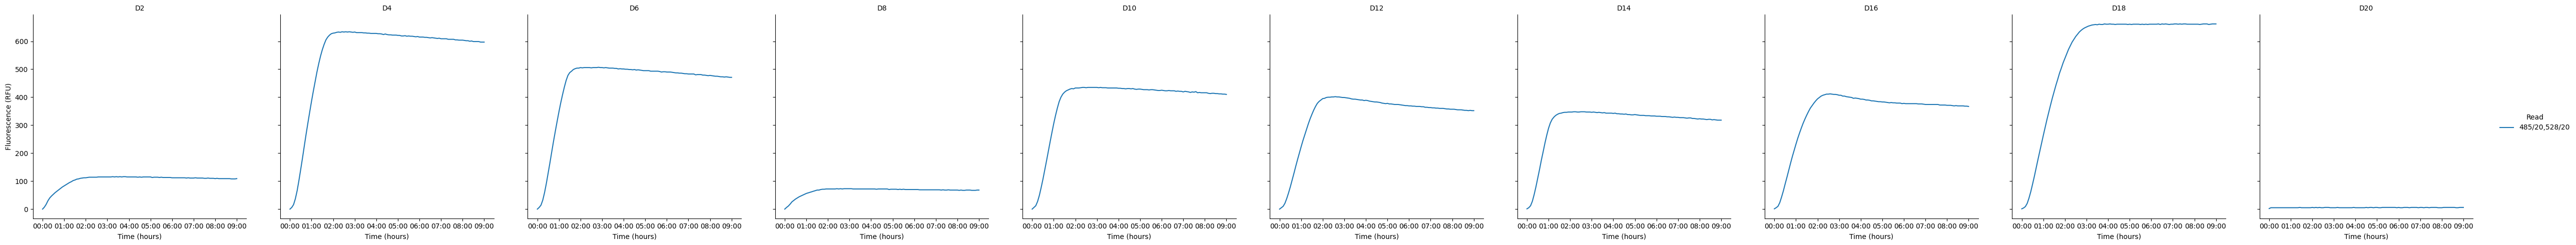

In [4]:
pr.plot_plate(data)

In [5]:
names_to_remove = ['5,10-methenyl-THF', 
                   'folinic + BE MTHFS (1 uL)', 
                   'folinic + BE MTHFS (1.61 uL)',
                   'NEB ribosome control']

replace_dict = {'no folinic acid':'no Folinic Acid',
                'no folinic + 5,10-methenyl-THF':'5,10-methenyl-THF',
                'folinic':'Folinic Acid',
                'folinic + MTHFS (0.5 uL)':'Folinic Acid + MTHFS'}

custom_order = ['no Folinic Acid', 
                'Folinic Acid', 
                'Folinic Acid + MTHFS', 
                '5,10-methenyl-THF', 
                'Positive', 
                'Negative']

data_drop = data.drop(data[data['Name'].isin(names_to_remove)].index)
data_drop['Name'] = data_drop['Name'].replace(replace_dict)

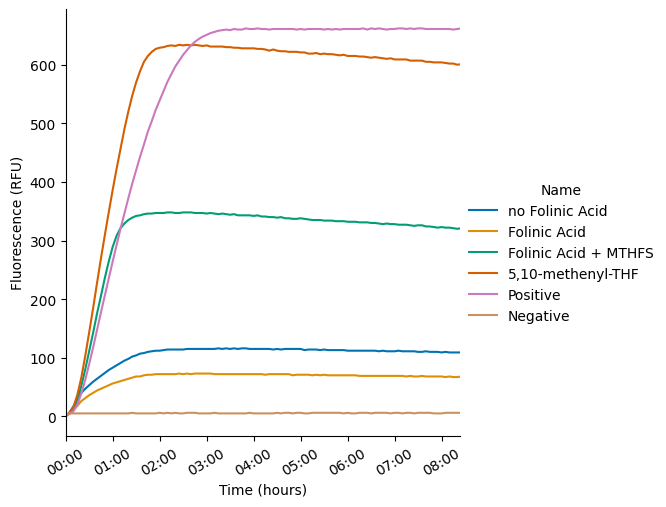

In [6]:
#| label: fig:kinetics

# Generate the plot (assuming `pr.plot_curves` returns a FacetGrid object)
sns.set_palette('colorblind')
g = pr.plot_curves(data_drop, hue_order=custom_order)
g.set_xticklabels(rotation=30)
plt.xlim([0,0.35])

plt.savefig("MTHFS_kinetics.png");

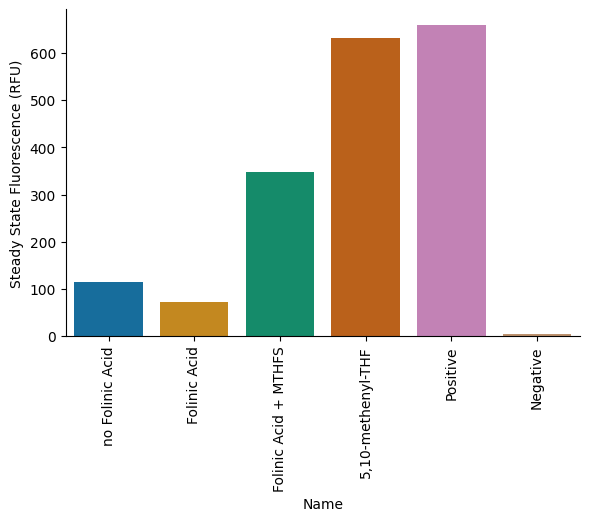

In [7]:
#| label: fig:endpoint

pr.plot_steadystate(data_drop, order=custom_order, palette='colorblind')

plt.savefig("MTHFS_endpoint.png");

In [8]:
kinetics = pr.kinetic_analysis(data_drop)

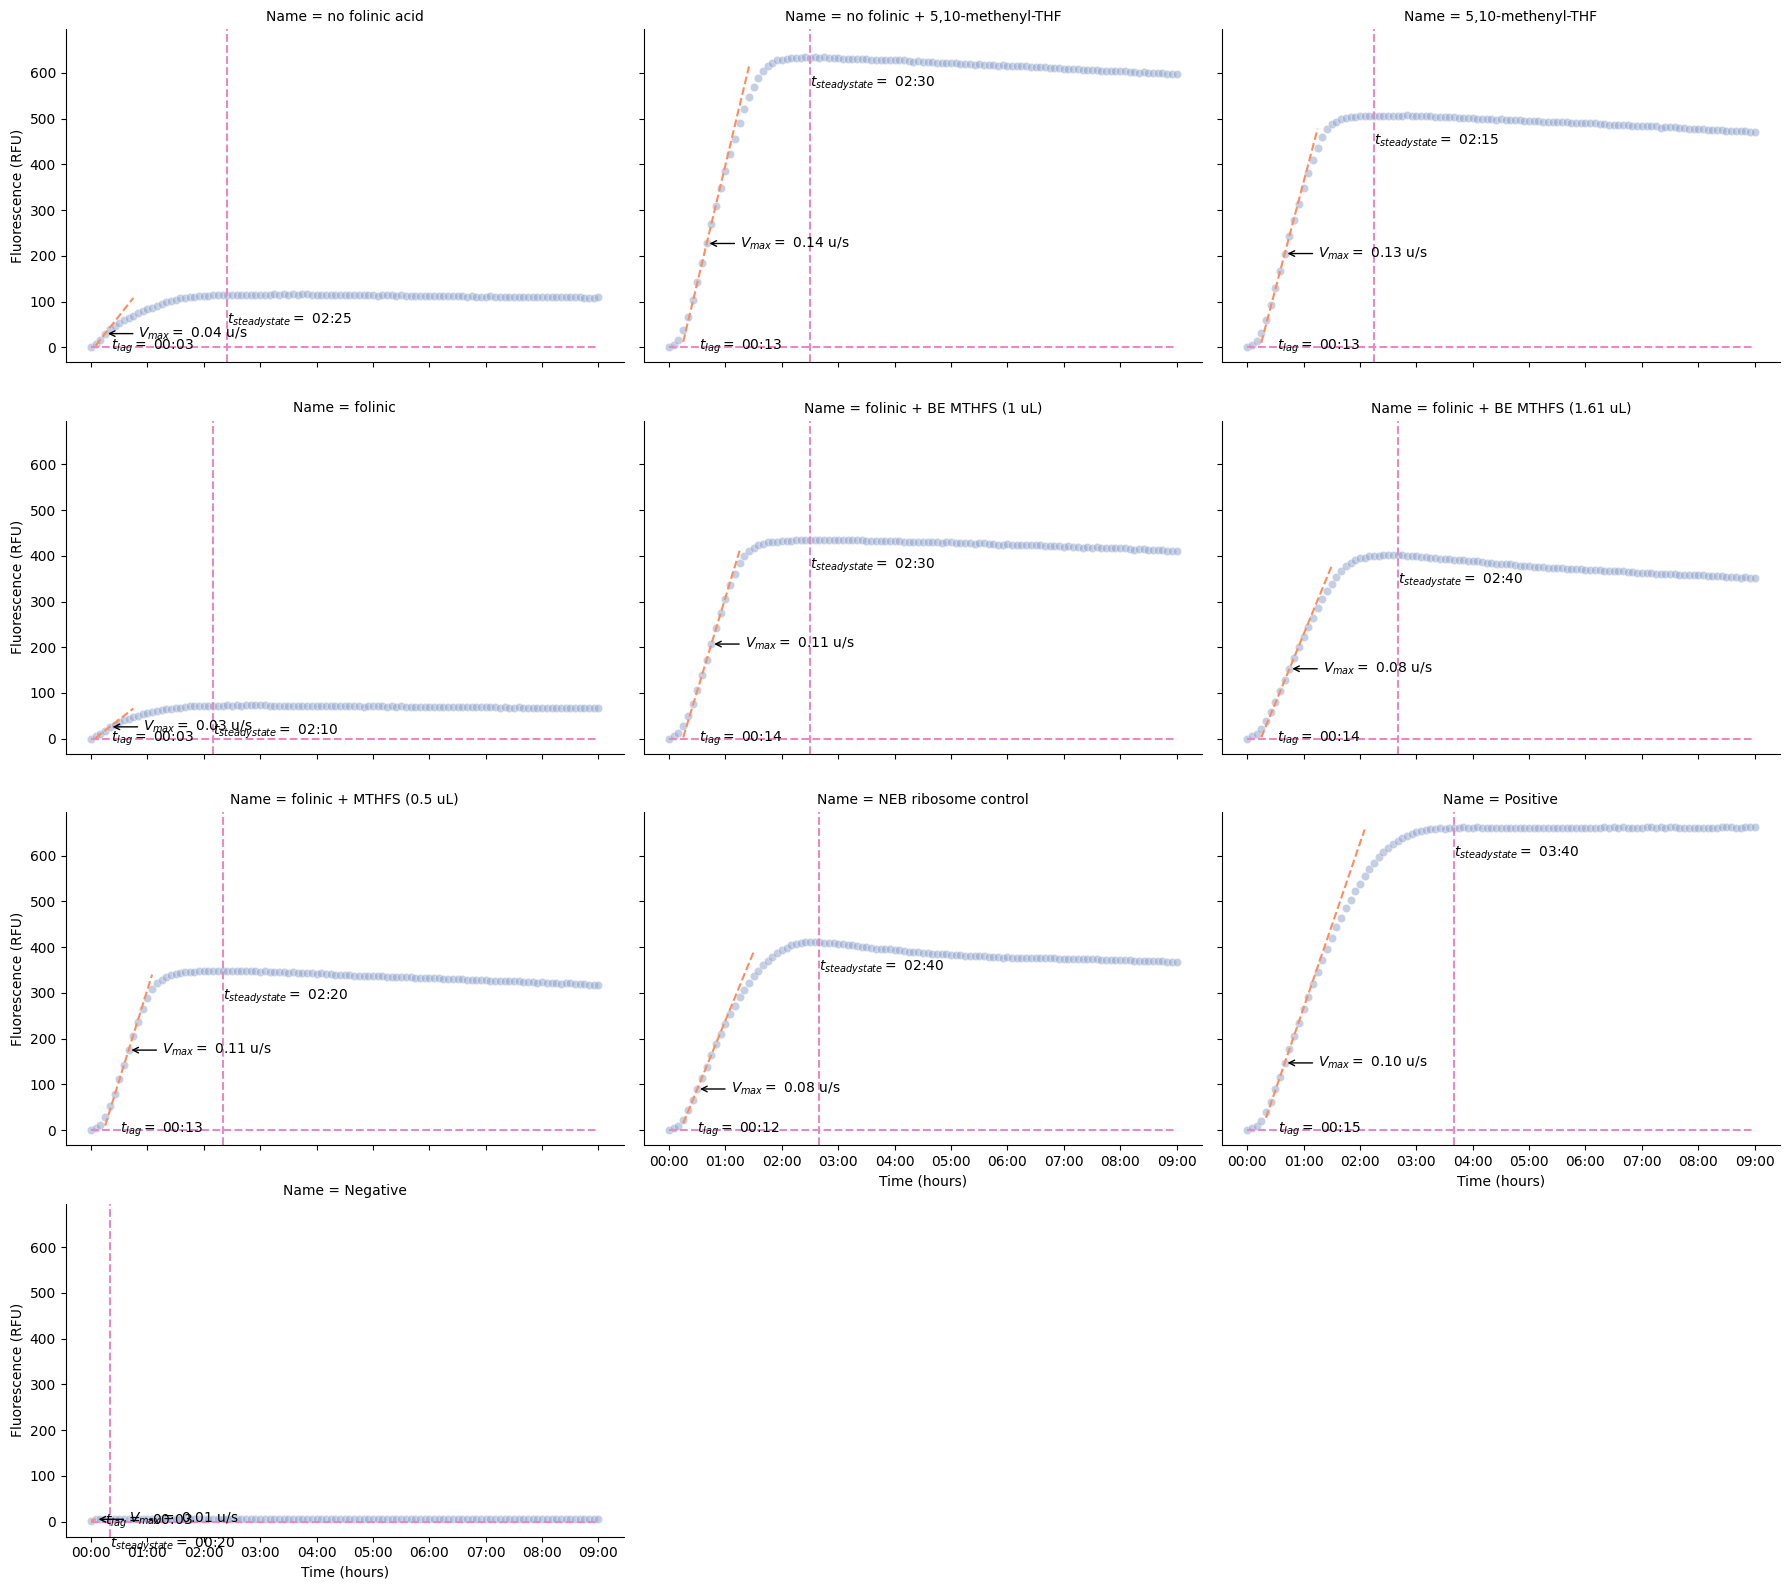

In [9]:
kinetics = pr.kinetic_analysis(data)
pr.plot_kinetics(data, kinetics)

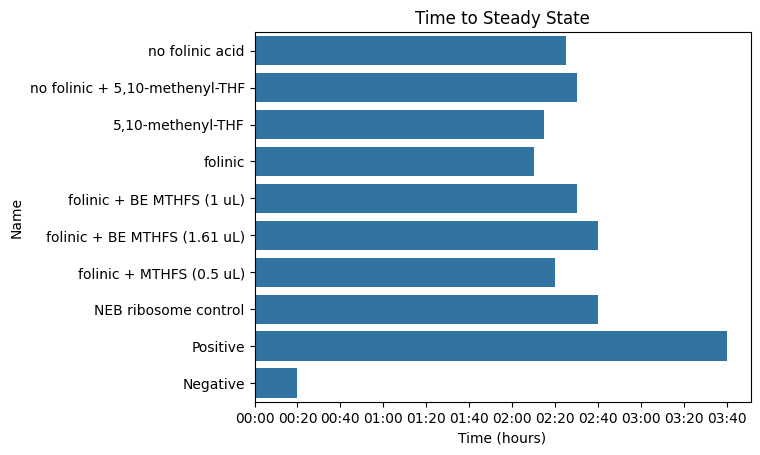

In [61]:
ax = sns.barplot(data=kinetics["Steady State"], y="Name", x="Time", orient="y")
ax.set_title("Time to Steady State")
pr._plot_timedelta(ax)


Text(0.5, 0, '$V_{max}$ (u/s)')

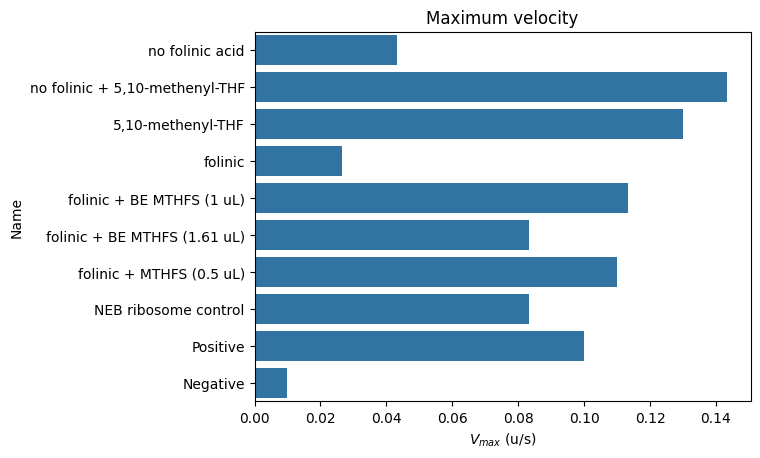

In [62]:
ax = sns.barplot(data=kinetics["Velocity"], y="Name", x="Max", orient="y")
ax.set_title("Maximum velocity")
ax.set_xlabel("$V_{max}$ (u/s)")

# Annotate plots

# Format time

In [11]:
import pandas as pd

def format_timedelta(td):
    if pd.isna(td):
        return ''
    
    # Convert to seconds
    total_seconds = td.total_seconds()
    
    # Calculate hours, minutes, seconds
    hours = int(total_seconds // 3600)
    minutes = int((total_seconds % 3600) // 60)
    seconds = int(total_seconds % 60)
    
    # Format as HH:MM:SS
    return f"{hours:02d}:{minutes:02d}:{seconds:02d}"
    
bonk = kinetics.xs("Time", level=1, axis=1).map(format_timedelta)
bonk.to_excel("bonk-time.xlsx")

In [12]:
kinetics

Velocity              \
                                                             Time   Data  Max   
Well Name                           Read                                        
D2   no folinic acid                485/20,528/20 0 days 00:15:00  30.00 0.04   
D4   no folinic + 5,10-methenyl-THF 485/20,528/20 0 days 00:40:00 227.00 0.14   
D6   5,10-methenyl-THF              485/20,528/20 0 days 00:40:00 205.00 0.13   
D8   folinic                        485/20,528/20 0 days 00:20:00  26.00 0.03   
D10  folinic + BE MTHFS (1 uL)      485/20,528/20 0 days 00:45:00 207.00 0.11   
D12  folinic + BE MTHFS (1.61 uL)   485/20,528/20 0 days 00:45:00 153.00 0.08   
D14  folinic + MTHFS (0.5 uL)       485/20,528/20 0 days 00:40:00 175.00 0.11   
D16  NEB ribosome control           485/20,528/20 0 days 00:30:00  90.00 0.08   
D18  Positive                       485/20,528/20 0 days 00:40:00 147.00 0.10   
D20  Negative                       485/20,528/20 0 days 00:05:00   5.00 0.01   

                                                                        Lag  \
                                                                       Time   
Well Name                           Read                                      
D2   no folinic acid                485/20,528/20 0 days 00:03:27.692307692   
D4   no folinic + 5,10-methenyl-THF 485/20,528/20 0 days 00:13:36.279069767   
D6   5,10-methenyl-THF              485/20,528/20 0 days 00:13:43.076923077   
D8   folinic                        485/20,528/20           0 days 00:03:45   
D10  folinic + BE MTHFS (1 uL)      485/20,528/20 0 days 00:14:33.529411765   
D12  folinic + BE MTHFS (1.61 uL)   485/20,528/20           0 days 00:14:24   
D14  folinic + MTHFS (0.5 uL)       485/20,528/20 0 days 00:13:29.090909091   
D16  NEB ribosome control           485/20,528/20           0 days 00:12:00   
D18  Positive                       485/20,528/20           0 days 00:15:30   
D20  Negative                       485/20,528/20         -1 days +23:56:40   

                                                          Steady State         \
                                                  Data            Time   Data   
Well Name                           Read                                        
D2   no folinic acid                485/20,528/20 0.00 0 days 02:25:00 114.00   
D4   no folinic + 5,10-methenyl-THF 485/20,528/20 0.00 0 days 02:30:00 633.00   
D6   5,10-methenyl-THF              485/20,528/20 0.00 0 days 02:15:00 506.00   
D8   folinic                        485/20,528/20 0.00 0 days 02:10:00  72.00   
D10  folinic + BE MTHFS (1 uL)      485/20,528/20 0.00 0 days 02:30:00 434.00   
D12  folinic + BE MTHFS (1.61 uL)   485/20,528/20 0.00 0 days 02:40:00 401.00   
D14  folinic + MTHFS (0.5 uL)       485/20,528/20 0.00 0 days 02:20:00 347.00   
D16  NEB ribosome control           485/20,528/20 0.00 0 days 02:40:00 411.00   
D18  Positive                       485/20,528/20 0.00 0 days 03:40:00 660.00   
D20  Negative                       485/20,528/20 0.00 0 days 00:20:00   5.00   

                                                  Fit        
                                                    L  k x0  
Well Name                           Read                     
D2   no folinic acid                485/20,528/20   0  0  0  
D4   no folinic + 5,10-methenyl-THF 485/20,528/20   0  0  0  
D6   5,10-methenyl-THF              485/20,528/20   0  0  0  
D8   folinic                        485/20,528/20   0  0  0  
D10  folinic + BE MTHFS (1 uL)      485/20,528/20   0  0  0  
D12  folinic + BE MTHFS (1.61 uL)   485/20,528/20   0  0  0  
D14  folinic + MTHFS (0.5 uL)       485/20,528/20   0  0  0  
D16  NEB ribosome control           485/20,528/20   0  0  0  
D18  Positive                       485/20,528/20   0  0  0  
D20  Negative                       485/20,528/20   0  0  0